In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('CreditData.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Age                       100000 non-null  int64  
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  int64  
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    100000 non-null  int64  
 13  Changed_Credit_Limit      100000 non-null  in

In [3]:
del data['ID']
del data['Customer_ID']
del data ['Occupation']
del data['Month']
del data['Delay_from_due_date']
del data['Num_Credit_Inquiries']
del data['Credit_Mix']
del data['Credit_Utilization_Ratio']
del data['Payment_of_Min_Amount']
del data['Payment_Behaviour']
del data['Credit_History_Age']


In [4]:
data.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,7,11,809,49.574949,80.415295,312.494089,Good
1,23,19114.12,4194.170850,3,4,3,4,31,11,809,49.574949,118.280222,284.629163,Good
2,33,19114.12,4194.170850,3,4,3,4,7,9,809,49.574949,81.699521,331.209863,Good
3,23,19114.12,4194.170850,3,4,3,4,4,6,809,49.574949,199.458074,223.451310,Good
4,23,19114.12,1824.843333,3,4,3,4,31,11,809,49.574949,41.420153,341.489231,Good


In [5]:
data["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
le_Credit_Score = LabelEncoder()
data['Credit_Score'] = le_Credit_Score.fit_transform(data['Credit_Score'])
data["Credit_Score"].unique()

array([0, 2, 1])

In [7]:
data.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,7,11,809,49.574949,80.415295,312.494089,0
1,23,19114.12,4194.170850,3,4,3,4,31,11,809,49.574949,118.280222,284.629163,0
2,33,19114.12,4194.170850,3,4,3,4,7,9,809,49.574949,81.699521,331.209863,0
3,23,19114.12,4194.170850,3,4,3,4,4,6,809,49.574949,199.458074,223.451310,0
4,23,19114.12,1824.843333,3,4,3,4,31,11,809,49.574949,41.420153,341.489231,0


In [8]:
data.to_csv("penchod.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      100000 non-null  int64  
 1   Annual_Income            100000 non-null  float64
 2   Monthly_Inhand_Salary    100000 non-null  float64
 3   Num_Bank_Accounts        100000 non-null  int64  
 4   Num_Credit_Card          100000 non-null  int64  
 5   Interest_Rate            100000 non-null  int64  
 6   Num_of_Loan              100000 non-null  int64  
 7   Num_of_Delayed_Payment   100000 non-null  int64  
 8   Changed_Credit_Limit     100000 non-null  int64  
 9   Outstanding_Debt         100000 non-null  int64  
 10  Total_EMI_per_month      100000 non-null  float64
 11  Amount_invested_monthly  100000 non-null  float64
 12  Monthly_Balance          100000 non-null  float64
 13  Credit_Score             100000 non-null  int32  
dtypes: fl

In [10]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

Class=0, n=17828 (17.828%)
Class=2, n=53174 (53.174%)
Class=1, n=28998 (28.998%)


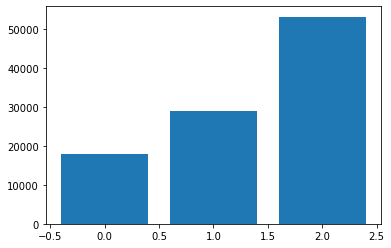

In [11]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=53174 (33.333%)
Class=2, n=53174 (33.333%)
Class=1, n=53174 (33.333%)


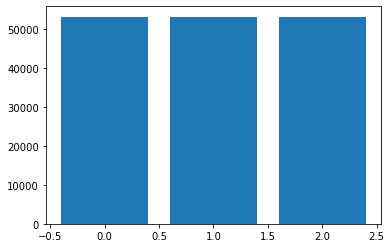

In [12]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10, random_state=5)  
rf_clf.fit(X_train.values, Y_train)  
rf_predictions = rf_clf.predict(X_test)

C:\Users\Siddhant.Panda\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [15]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
print(classification_report(Y_test,rf_predictions ))  
print(accuracy_score(Y_test, rf_predictions ))
print(f1_score(Y_test, rf_predictions, average='weighted'))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87     16078
           1       0.84      0.87      0.85     15984
           2       0.80      0.71      0.75     15795

    accuracy                           0.83     47857
   macro avg       0.83      0.83      0.82     47857
weighted avg       0.83      0.83      0.83     47857

0.8274651566124078
0.8253047076045896


In [16]:
import pickle
data = {"model": rf_clf}
pickle.dump(data, open('RFModel.pkl','wb'))

In [17]:
def load_model():
    with open(r"C:\Users\Siddhant.Panda\Desktop\MiniProject\ML\RFModel.pkl", 'rb') as file:
        data = pickle.load(file)
    return data

load_model() 

{'model': RandomForestClassifier(n_estimators=10, random_state=5)}

In [18]:
def load_model():
    with open(r"C:\Users\Siddhant.Panda\Desktop\MiniProject\ML\RFModel.pkl", 'rb') as file:
        data = pickle.load(file)
    return data
data = load_model() 

classification = data["model"]

[0]
